In [1]:
get_ipython().run_line_magic('run', 'main.py')


import pickle 
import matplotlib.animation as animation
import os

galactic_radius = 20  ##galactic radius is fixed in kpc
    
def mass_density_plot(radius, density_catalog, z, title = "Mass Density"): 
        
        "takes in radius and density catalog and plots the mass density" 
        
        for z in density_catalog: 
            masses = density_catalog[z]
            
            x = masses
            y = radius 
            
        plt.plot(x,y) 
        plt.title(title)

In [2]:
os.listdir('../data')

['cat_id_2_stars_coords_snap_99',
 'cat_id_2_stars_coords_snap_97',
 'cat_id_2_stars_coords_snap_90',
 'cat_id_2_stars_coords_snap_91',
 'cat_id_2_stars_coords_snap_96',
 'cat_id_2_stars_coords_snap_98',
 '.DS_Store',
 'cat_id_0_dm_coords_snap_92',
 'cat_id_0_dm_coords_snap_95',
 'cat_id_0_dm_coords_snap_94',
 'cat_id_0_dm_coords_snap_93',
 'input',
 'cat_id_2_stars_coords_snap_93',
 'cat_id_2_stars_coords_snap_94',
 'cat_id_2_stars_coords_snap_95',
 'cat_id_2_stars_coords_snap_92',
 'cat_id_0_dm_coords_snap_98',
 'cat_id_0_dm_coords_snap_96',
 'cat_id_0_dm_coords_snap_91',
 'cat_id_0_dm_coords_snap_90',
 'cat_id_0_dm_coords_snap_97',
 'cat_id_0_dm_coords_snap_99']

In [21]:
path = "../data/"

In [22]:
def open_pickle(filename):
    
    "opens the galaxy file using pickle. Filename- name of file to open"
    
    try:
        with open(filename, 'rb') as f:
            coords = pickle.load(f)
        return coords
    
    except FileNotFoundError:
        print("File not found.")  

In [23]:
def column(matrix, i, N):
    
    "takes in matrix, gives the column of matrix and an N number for output. x is 0, y is 1, z is 2"
    
    row = [row[i] for row in matrix]
    coord = row[:N]
    
    return coord

In [24]:
from astropy.cosmology import WMAP9 as cosmo
import plotly
import plotly.graph_objs as go
import plotly.offline as pyo

In [25]:
filenames = os.listdir('../data/')
filenames = [x for x in filenames if 'coords' in x and 'dm' in x]
filenames.sort()
filenames


['cat_id_0_dm_coords_snap_90',
 'cat_id_0_dm_coords_snap_91',
 'cat_id_0_dm_coords_snap_92',
 'cat_id_0_dm_coords_snap_93',
 'cat_id_0_dm_coords_snap_94',
 'cat_id_0_dm_coords_snap_95',
 'cat_id_0_dm_coords_snap_96',
 'cat_id_0_dm_coords_snap_97',
 'cat_id_0_dm_coords_snap_98',
 'cat_id_0_dm_coords_snap_99']

In [26]:
def scatterplotgalaxy(x, y, z): 
    
    "using x, y, and z from the column function, take in the arrays and makes a 3D scatter plot of mass distribution"
   
    trace = go.Scatter3d(x=x, y=y, z=z,  mode='markers')
    
    # Configure the layout.
    layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})
    data = [trace]
    
    fig = go.Figure(data=data)
    fig.update_layout(scene = dict(xaxis_title='Mpc', yaxis_title='Mpc', zaxis_title='Mpc'))
    
    # Render the plot.
    plotly.offline.iplot(fig)
    plt.savefig("image")

In [36]:
def update(idx):
    
    snap = open_pickle(path + filenames[idx])
    
    x = column(snap, 0, 1000)
    y = column(snap, 1, 1000)
    # z = column(snap, 2, 1000)
    
    data = np.stack([x, y]).T
    # scat.remove()
    scat.set_offsets(data)
    
    return scat

MovieWriter ffmpeg unavailable; using Pillow instead.


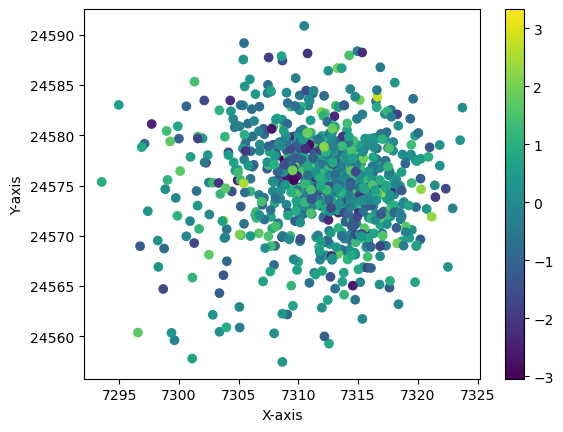

In [48]:
import ffmpeg

fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot()

snap = open_pickle(path + filenames[0])

x = column(snap, 0, 1000)
y = column(snap, 1, 1000)
# z = column(snap, 2, 1000)

scat = ax.scatter(x, y, c = np.random.randn(1000),marker='o', cmap ='viridis')
fig.colorbar(scat)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')


# ani = animation.FuncAnimation(fig, scatterplotgalaxy(x,y,z), 10)
ani = animation.FuncAnimation(fig = fig, func = update, frames = 5)

ani.save('ex.gif')

# plt.show()

In [20]:
snap

In [11]:
###make a function that iterates through al 20 of the maps and appends their x y and z to empty arrays
#then using that, itterate through to get the different imagees to reccord 

In [ ]:
def hopethisgifworks(array, N):
    
    for i in range(array): 
        file = open_pickle(filename)
        
        x = column(file, 0, N)
        y = column(file, 1, N)
        z = column(file, 2, N)
        
        scatter = scatterplotgalaxy(x, y, z)
    

In [ ]:
hopethisgifworks(twenty, N = 10)